### **1 Data Preprocessing**

In [ ]:
# This section demonstrates how to preprocess a breast cancer dataset, including data cleaning and normalization.

# Import necessary libraries
import numpy as np  # For numerical calculations
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import pandas as pd  # For data processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For feature scaling

# Load the dataset
df = pd.read_csv('./breast-cancer.txt')  # Read breast cancer data
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# Drop missing values
df.dropna(inplace=True)  # Remove all rows with missing values

# Keep only numeric data
df = df._get_numeric_data()

# Drop irrelevant columns
df.drop(['id'], axis=1, inplace=True) # The 'id' column is irrelevant, so we drop it

### **2 Extract Features and Target**

In [ ]:
# Extract features X and target variable y
X = np.array(df.drop(['class'], axis=1))  # Drop the 'class' column for features, keep the rest
y = np.array(df['class'])  # The 'class' column is the target

# Use MinMaxScaler to scale features
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale features between 0 and 1
X = scaler.fit_transform(X)  # Apply scaling

# Use StandardScaler for standardization
# scaler2 = StandardScaler()
# scaler2.fit(X)


### **3 Split Data into Training and Testing Sets**

In [ ]:
# Convert target variable to 0 and 1
y = np.array(y == 4).astype(int)  # If class is 4 (malignant), set it to 1, otherwise 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% training, 20% testing

# Print the shape of the training set
print(X_train.shape)  # Output the dimensions of the training set


(559, 8)


### **4 Data Visualization**

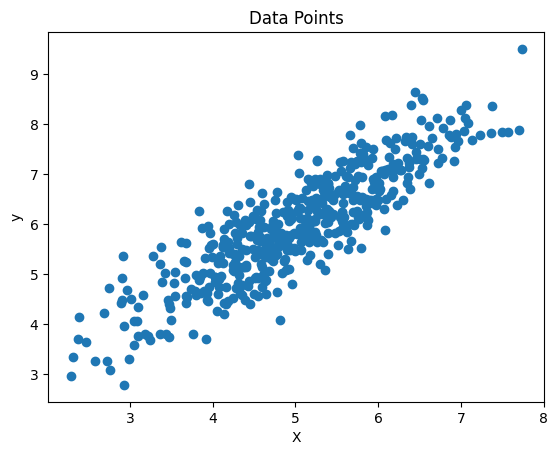

In [ ]:
# Task 3: Gradient Descent
# This section implements gradient descent to fit data

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt  # For plotting

# Load gradient descent dataset
data = np.loadtxt('./GD_Example.txt')  # Load the data
X = data[:, 0]  # Features
y = data[:, 1]  # Labels

# Plot the data points
plt.figure()
plt.scatter(X, y)  # Plot scatter plot
plt.xlabel('X')  # X-axis label
plt.ylabel('y')  # Y-axis label
plt.title('Data Points')  # Title
plt.show()  # Show the plot


### **5 Cost Function**

In [ ]:
# Define the cost function
# This function calculates the prediction error of the model, measuring how well the current parameters m and b fit.
def cost_function(X, y, m, b):
    n = len(X)  # Number of samples
    total_error = 0.0  # Initialize total error
    for i in range(n):
        total_error += (y[i] - (m * X[i] + b)) ** 2  # Calculate squared error
    return total_error / n  # Return the average error


### **6 Gradient Descent Algorithm**

In [ ]:
# Initialize variables
m = 0
b = 0
learning_rate = 0.0001  # Learning rate
epochs = 1000  # Number of iterations

# Implement gradient descent algorithm
for epoch in range(epochs):
    b_gradient = 0  # Initialize gradient for b
    m_gradient = 0  # Initialize gradient for m
    N = float(len(X))  # Number of samples

    # Compute the gradients
    for i in range(len(X)):
        b_gradient += -(2/N) * (y[i] - (m * X[i] + b))  # Compute gradient for b
        m_gradient += -(2/N) * X[i] * (y[i] - (m * X[i] + b))  Compute gradient for m

    b = b - (learning_rate * b_gradient)  # Update b's value
    m = m - (learning_rate * m_gradient)  # Update m's value

    # Print the cost every 50 epochs
    if epoch % 50 == 0:
        print("Epoch {}: Cost={}".format(epoch, cost_function(X, y, m, b)))  # Output the current epoch and cost


Epoch 0: Cost=36.68519994445068
Epoch 50: Cost=21.42548307068589
Epoch 100: Cost=12.570859192205093
Epoch 150: Cost=7.432856949670537
Epoch 200: Cost=4.451462960248564
Epoch 250: Cost=2.721463282872855
Epoch 300: Cost=1.7175981421316036
Epoch 350: Cost=1.1350801069519165
Epoch 400: Cost=0.7970531101256547
Epoch 450: Cost=0.6008945848384777
Epoch 500: Cost=0.48705672260145866
Epoch 550: Cost=0.420986290083121
Epoch 600: Cost=0.3826334153540712
Epoch 650: Cost=0.3603639523228216
Epoch 700: Cost=0.3474270670773994
Epoch 750: Cost=0.3399055182327191
Epoch 800: Cost=0.3355262858487452
Epoch 850: Cost=0.3329704265277594
Epoch 900: Cost=0.33147260967848036
Epoch 950: Cost=0.3305887442809386


### **7 Plot the Final Fitting Line**

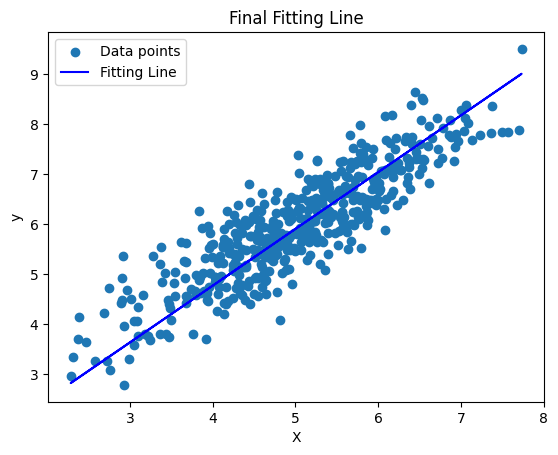

In [ ]:
# Plot the final fitting line
plt.figure()
plt.scatter(X, y, label='Data points')  # Plot data points
plt.plot(X, m*X + b, color='blue', label='Fitting Line')  # Plot the fitting line
plt.xlabel('X')  # X-axis label
plt.ylabel('y')  # Y-axis label
plt.title('Final Fitting Line')  # Title
plt.legend()  # Show the legend
plt.show()  # Show the plot
